# *Lab 10: Simulated Annealing*

## *Exercise 2*

## *Importing the packages*

In [ ]:
import numpy as np
import math
from pprint import pprint
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from tqdm import tqdm
from ast import literal_eval
import copy
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## *Question 1:*

The Travelling Salesman Problem (TSP) is the challenge of finding the shortest yet most efficient route for a person to travel via, given a list of specific destinations. There are a lot of different routes to choose from, but finding the best one — the one that will require the least distance or cost is what is at the core of the TSP problem.

TSP belongs to the class of combinatorial optimization problems known as NP-complete. The complexity of calculating the best route will increase when we add more destinations to the problem. 

**NOTE: NEED TO UPLOAD THE CSV FILES FIRST**. Path specified accordingly
- Upload path: Files >  Upload to session storage

In [ ]:
from google.colab import drive
dist11 = np.loadtxt(open("TSP11.csv", "rb"), delimiter = ",")
dist48 = np.loadtxt(open("TSP48.csv", "rb"), delimiter = ",")

## *Question 4:*

## *Function to calculate the total cost (distance) of a particular route*

In [ ]:
def cost(dist, cities):
    dist_travelled = 0
    current_pos = cities[0]
    for i in range(1,len(cities)):
        dist_travelled += dist[current_pos][cities[i]]
        current_pos = cities[i] 
    return dist_travelled

## *Question 5:*


## *Function to find the feasible neighbours of a state, and select one uniformly*

In [ ]:
def neighbour(current_state):
    feasible_neighbours = []
    for i in range(len(current_state)-1):
        temp = copy.deepcopy(current_state)
        temp[i], temp[i+1] = temp[i+1], temp[i] 
        if ((temp not in feasible_neighbours) == True) and (temp != current_state):
            feasible_neighbours.append(temp)
    current_state[0], current_state[-1] = current_state[-1], current_state[0]
    feasible_neighbours.append(current_state)
    selected_neighbour = random.choice(feasible_neighbours)
    return feasible_neighbours, selected_neighbour

feasible_neighbours, selected_state = neighbour(['A','B','C','D'])
print("Feasible neighbours of the state ['A','B','C','D']: \n")
pprint(feasible_neighbours)

Feasible neighbours of the state ['A','B','C','D']: 

[['B', 'A', 'C', 'D'],
 ['A', 'C', 'B', 'D'],
 ['A', 'B', 'D', 'C'],
 ['D', 'B', 'C', 'A']]


## **Question 6:**

>- When new cost gets more than the current one, then $(c' -c) \geq 0$ implying $\frac{-(c'-c)}{T_k} \leq 0$. Thus the acceptance probability (given by $e^{\frac{-(c'-c)}{T_k}}$) tends to 0 as $(c' - c)$ increases.
>- When the temperature decreases, $\frac{(c'-c)}{T_k}$ increases, hence $\frac{-(c'-c)}{T_k}$ decreases and the acceptance probability tends to 0.

## *Function to define the acceptance probability*

In [ ]:
def acceptance_prob(curr_cost, new_cost, temp):
    return math.exp(-((new_cost - curr_cost)/temp))

## **Question 7:**

## *Function to define the cooling schedule*

In [ ]:
def cooling_schedule(alpha, T_k):
    return alpha*T_k

## *Question 8:*


## *Function for simulated annealing*

In [ ]:
def simulated_annealing(dist, max_iter, alpha, T_0):
    T = T_0
    # current_state = np.random.permutation(np.arange(len(dist))).tolist()
    current_state = [i for i in range(len(dist))] 
    current_state.append(current_state[0])
    initial_state = current_state.copy()
    current_cost = cost(dist, current_state)
    cost_array = [current_cost]
    min_cost = current_cost
    best_state = current_state
    for k in range(max_iter):
        _, new_state = neighbour(current_state[1:-1])
        new_state.insert(0, current_state[-1])
        new_state.append(current_state[-1])
        new_cost = cost(dist, new_state)
        T = cooling_schedule(alpha, T)
        if new_cost <= current_cost:
            current_state = new_state
        else:
            unif = np.random.uniform()
            if unif <= acceptance_prob(current_cost, new_cost, T):
                current_state = new_state
            else:
                pass
        current_cost = cost(dist, current_state)
        if min_cost > current_cost:
            best_state = current_state
            min_cost = current_cost
        cost_array.append(current_cost)
    return initial_state, best_state, cost_array

In [ ]:
max_iter = 100
alpha = 0.8
T_0 = 1

In [ ]:
initial_sol_11, solution_11, cost_array_11 = simulated_annealing(dist11, max_iter, alpha, T_0)


For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]





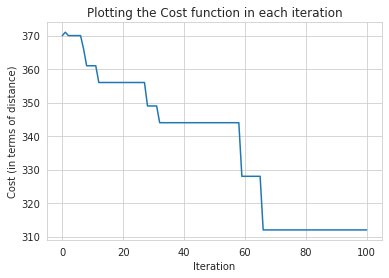

In [ ]:
print()
print("For randomly initialized tour path:", initial_sol_11)
print("Best Solution (Best travel route):", solution_11)
print("\n")
print()
plt.plot(cost_array_11)
plt.title("Plotting the Cost function in each iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()

#### *Comments:*
> We observe that cost stops changing after around 62 iterations. However, prior to that, the cost decreases rapidly with each iteration as the optimal tour selected by the algorithm changes.

## *Varying T and keeping alpha fixed*


------------------- VARYING T_0 -------------------

For T_0: 1
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 5, 6, 10, 7, 9, 8, 0]



For T_0: 2
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For T_0: 3
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For T_0: 4
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]





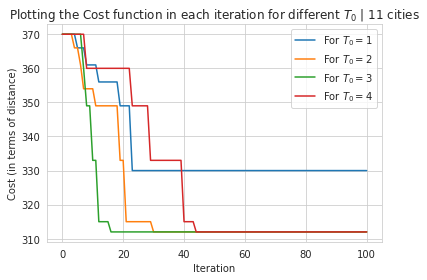

In [ ]:
T_list = [1,2,3,4]
alpha = 0.8
max_iter = 100
best_sols = []
print()
print("------------------- VARYING T_0 -------------------")
print()
for T in T_list:
    initial_sol, solution, cost_array = simulated_annealing(dist11, max_iter, alpha, T)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For $T_0 = {T}$")
    print(f"For T_0: {T}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    print()
plt.title("Plotting the Cost function in each iteration for different $T_0$ | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()

#### *Comments while varying $T_0 = \{1,2,3,4\}$ and keeping $\alpha$ fixed* | 11 cities case
>- Cost decreases with each iteration as the optimal tour selected by the algorithm changes in each iteration. However, after certain iterations, the algorithm stops changing its optimal tour selection.
- We observe that minimum cost (and hence the best tour obtained from the algorithm) is observed for $T_0 = 2$, $T_0 = 3$ and $4$ ($T_0= 4$ takes slightly higher iterations to reach the minimum cost compared to $T_0 = 2$ and$T_0 = 3$). However, for different runs of the algorithm, the conclusion might change. In general, all the $T_0$ values show similar behaviour and are more or less comparable.


## *Varying alpha and keeping T_0 fixed*


-------------------- VARYING alpha -------------------


For alpha: 0.8
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For alpha: 0.85
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 9, 5, 6, 10, 7, 8, 0]



For alpha: 0.9
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]



For alpha: 0.95
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 9, 5, 6, 10, 7, 8, 0]





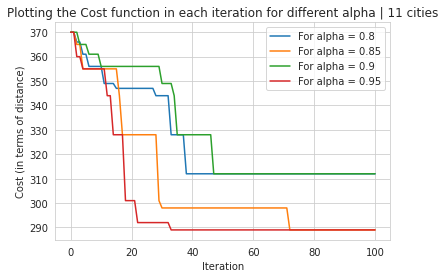

In [ ]:
T_0 = 1 
alpha_list = [0.8, 0.85, 0.9, 0.95]
max_iter = 100
best_sols = []
print()
print("-------------------- VARYING alpha -------------------")
print()
print()
for alpha in alpha_list:
    initial_sol, solution, cost_array = simulated_annealing(dist11, max_iter, alpha, T_0)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For alpha = {alpha}")
    print(f"For alpha: {alpha}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    print()
plt.title(r"Plotting the Cost function in each iteration for different alpha | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()

#### *Comments while varying $\alpha = \{0.8, 0.85, 0.9, 0.95\}$ and keeping $T_0$ fixed* | 11 cities case
>- Cost decreases with each iteration as the optimal tour selected by the algorithm changes. The behaviour is almost the same for all the choices of $\alpha$. 
- For this particular run, the minimum cost (and hence the best choice of tour path) is obtained when $\alpha = 0.95$


## **Question 9:**

The alternate cooling schedule that we come up with is as follows:
$T_k = \frac{T_0}{1 + \alpha\ log(1+k)}$

In [ ]:
def new_cooling_schedule(alpha, k):
    return T_0/(1+alpha*np.log(1+k))

## *Function for simulated annealing using new cooling schedule*


For the 11 city case:

For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Best Solution (Best travel route): [0, 1, 2, 4, 3, 6, 5, 9, 7, 10, 8, 0]





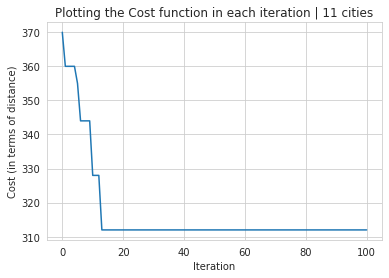


For the 48 city case:

For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 47, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 22, 21, 24, 25, 23, 26, 27, 30, 28, 29, 32, 33, 34, 31, 36, 35, 37, 39, 40, 41, 38, 43, 42, 44, 46, 45, 2, 0]





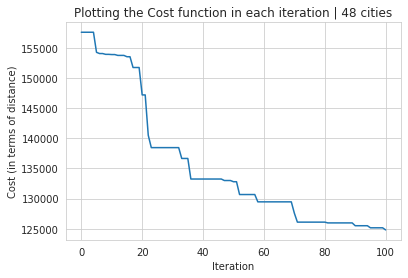

In [ ]:
def new_simulated_annealing(dist, max_iter, alpha, T_0):
    T = T_0
    # current_state = np.random.permutation(np.arange(len(dist))).tolist()
    current_state = [i for i in range(len(dist))] 
    current_state.append(current_state[0])
    initial_state = current_state.copy()
    current_cost = cost(dist, current_state)
    cost_array = [current_cost]
    min_cost = current_cost
    best_state = current_state
    for k in range(max_iter):
        _, new_state = neighbour(current_state[1:-1])
        new_state.insert(0, current_state[-1])
        new_state.append(current_state[-1])
        new_cost = cost(dist, new_state)
        T = new_cooling_schedule(alpha, k)
        if new_cost <= current_cost:
            current_state = new_state
        else:
            unif = np.random.uniform()
            if unif <= acceptance_prob(current_cost, new_cost, T):
                current_state = new_state
            else:
                pass
        current_cost = cost(dist, current_state)
        if min_cost > current_cost:
            best_state = current_state
            min_cost = current_cost
        cost_array.append(current_cost)
    return initial_state, best_state, cost_array

max_iter = 100
alpha = 1.8
T_0 = 1
initial_sol, solution, cost_array = new_simulated_annealing(dist11, max_iter, alpha, T_0)
print()
print("For the 11 city case:\n")
print("For randomly initialized tour path:", initial_sol)
print("Best Solution (Best travel route):", solution)
print("\n")
print()
plt.plot(cost_array)
plt.title("Plotting the Cost function in each iteration | 11 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()
initial_sol, solution, cost_array = new_simulated_annealing(dist48, max_iter, alpha, T_0)
print()
print("For the 48 city case:\n")
print("For randomly initialized tour path:", initial_sol)
print("Best Solution (Best travel route):", solution)
print("\n")
print()
plt.plot(cost_array)
plt.title("Plotting the Cost function in each iteration | 48 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()

#### *Comments:*
>- We observe that with the alternate cooling schedule, the behaviour of the algorithm remains the same, with decrease in cost as iterations progress.

## *Question 10:*


For randomly initialized tour path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 2, 1, 3, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18, 16, 19, 20, 22, 21, 25, 23, 24, 26, 27, 28, 30, 29, 32, 33, 31, 34, 36, 35, 37, 39, 38, 41, 40, 43, 42, 44, 47, 46, 45, 0]





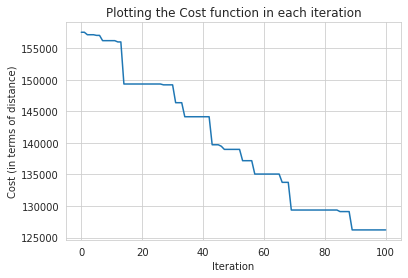

In [ ]:
max_iter = 100
alpha = 0.8
T_0 = 1
initial_sol_48, solution_48, cost_array_48 = simulated_annealing(dist48, max_iter, alpha, T_0)
print()
print("For randomly initialized tour path:\033[0m", initial_sol_48)
print("Best Solution (Best travel route):", solution_48)
print("\n")
print()
plt.plot(cost_array_48)
plt.title("Plotting the Cost function in each iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.show()

## *Varying T and keeping alpha fixed for the 48 cities case*

In [ ]:
T_list = [1,2,3,4]
alpha = 0.8
max_iter = 100
best_sols = []
print()
print("----------------------- VARYING T_0 -----------------------")
print()
for T in T_list:
    initial_sol, solution, cost_array = simulated_annealing(dist48, max_iter, alpha, T)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For $T_0 = {T}$")
    print(f"For T_0: {T}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    print()
plt.title("Plotting the Cost function in each iteration for different $T_0$ | 48 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()


----------------------- VARYING T_0 -----------------------

For T_0: 1
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 47, 3, 1, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 22, 21, 24, 25, 23, 26, 27, 29, 32, 30, 28, 33, 31, 34, 36, 35, 37, 39, 38, 41, 44, 40, 42, 43, 45, 46, 2, 0]



For T_0: 2
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 1, 3, 2, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 25, 23, 24, 26, 27, 28, 29, 30, 32, 31, 34, 33, 35, 36, 37, 39, 38, 40, 41, 42, 43, 45, 46, 44, 47, 0]



For T_0: 3
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 

#### *Comments while varying $T_0= \{1,2,3,4\}$  and keeping $\alpha$ fixed |*  48 cities case
>- The algorithm takes higher number of iterations to reach the best tour path as the data set increases from 11 cities to 48 cities. 
- The costs keep decreasing with iterations as the algorithm proceeds.
- Best tour path with minimum cost is obtained when $T_0 = 1$. However, this would vary with different run of the algorithm. In general, the behaviour would be the same for different choices of $T_0$.


## *Varying alpha and keeping T_0 fixed for the 48 cities case*


-------------------------- VARYING alpha --------------------------


For alpha: 0.8
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 1, 3, 2, 4, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 17, 18, 16, 19, 20, 21, 22, 24, 23, 25, 29, 26, 27, 30, 32, 28, 31, 34, 33, 35, 36, 37, 39, 38, 42, 40, 41, 44, 45, 43, 46, 47, 0]



For alpha: 0.85
Initial Tour Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 0]
Best Solution (Best travel route): [0, 1, 3, 4, 2, 5, 6, 8, 7, 9, 10, 11, 12, 13, 15, 14, 16, 18, 17, 19, 20, 22, 21, 24, 25, 23, 27, 26, 29, 30, 28, 32, 31, 34, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 44, 46, 47, 0]



For alpha: 0.9
Initial Tour Path: [0, 1,

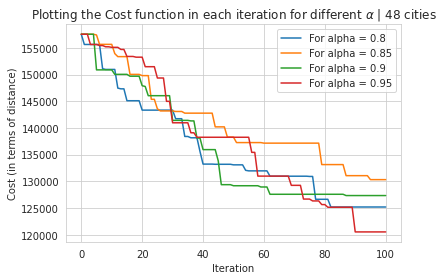

In [ ]:
T_0 = 1 
alpha_list = [0.8, 0.85, 0.9, 0.95]
max_iter = 100
best_sols = []
print()
print("-------------------------- VARYING alpha --------------------------")
print()
print()
for alpha in alpha_list:
    initial_sol, solution, cost_array = simulated_annealing(dist48, max_iter, alpha, T_0)
    best_sols.append(solution)
    plt.plot(cost_array, label = f"For alpha = {alpha}")
    print(f"For alpha: {alpha}")
    print("Initial Tour Path:", initial_sol)
    print("Best Solution (Best travel route):", solution)
    print("\n")
    print()
plt.title(r"Plotting the Cost function in each iteration for different $\alpha$ | 48 cities")
plt.xlabel("Iteration")
plt.ylabel("Cost (in terms of distance)")
plt.legend()
plt.show()

#### *Comments while varying $\alpha = \{0.8, 0.85, 0.9, 0.95\}$ and keeping $T_0$ fixed* | 48 cities case
>- The algorithm takes higher number of iterations to reach the best tour path as the data set increases from 11 cities to 48 cities. 
- The costs keep decreasing with iterations as the algorithm proceeds.
- Best tour path with minimum cost is obtained when $\alpha = 0.95$. However, this would vary with different run of the algorithm. In general, the behaviour would be the same for different choices of $\alpha$.
